In [1]:
import sys
import numpy as np
import pandas as pd

import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
plt.style.use('seaborn') 

from unicodedata import normalize
#from bs4 import BeautifulSoup

print( f"Python {sys.version}" )
print( f"Pandas {pd.__version__}" )
print( f"NumPy {np.__version__}" )
print( f"Matplotlib {mpl.__version__}" )

Python 3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]
Pandas 1.2.4
NumPy 1.20.1
Matplotlib 3.3.4


## Import rainfall data which was kindly provided by Thai Meteorological Department (TMD).

I wrote a letter to TMD asking for support of rainfall data record from all stations in Thailand from 1987 to 2022.
My goal was to analyze data and see of there is a trend in rainfall changes to support La Nina event. Therefore, I specifically requested for montly record of rainfall rather than weekly or hourly records.

Note that unit of numerical data is milimeter (mm).

In [2]:
#may need to change path of the MonthlyRain.htm
rain = pd.read_html('C:/Users/kruawunj/Desktop/MonthlyRain.htm')
print(f'Total tables: {len(rain)}')
rain

#rain.head()

Total tables: 2


[        0                               1     2      3      4      5      6   \
 0      ที่         รหัสสถานี-สถานี-จังหวัด    ปี  เดือน  เดือน  เดือน  เดือน   
 1      ที่         รหัสสถานี-สถานี-จังหวัด    ปี   ม.ค.   ก.พ.  มี.ค.  เม.ย.   
 2        1  300201-แม่ฮ่องสอน จ.แม่ฮ่องสอน  1987   14.3    0.0   20.3   84.5   
 3        2  300201-แม่ฮ่องสอน จ.แม่ฮ่องสอน  1988    0.0    0.0      T   25.6   
 4        3  300201-แม่ฮ่องสอน จ.แม่ฮ่องสอน  1989    4.2    0.0    0.1   12.0   
 ...    ...                             ...   ...    ...    ...    ...    ...   
 4305  4304      583201-นราธิวาส จ.นราธิวาส  2018  360.5   43.8   88.0   84.3   
 4306  4305      583201-นราธิวาส จ.นราธิวาส  2019  239.9   69.5    4.5   19.9   
 4307  4306      583201-นราธิวาส จ.นราธิวาส  2020   27.4   84.4    5.0  161.6   
 4308  4307      583201-นราธิวาส จ.นราธิวาส  2021  205.4    3.9   73.7   61.5   
 4309  4308      583201-นราธิวาส จ.นราธิวาส  2022   29.4  536.1  177.3  230.7   
 
          7      8      9 

#### Select Table to work with

In [3]:
rain1 = rain[0]
rain1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,ที่,รหัสสถานี-สถานี-จังหวัด,ปี,เดือน,เดือน,เดือน,เดือน,เดือน,เดือน,เดือน,เดือน,เดือน,เดือน,เดือน,เดือน,เฉลี่ย
1,ที่,รหัสสถานี-สถานี-จังหวัด,ปี,ม.ค.,ก.พ.,มี.ค.,เม.ย.,พ.ค.,มิ.ย.,ก.ค.,ส.ค.,ก.ย.,ต.ค.,พ.ย.,ธ.ค.,เฉลี่ย
2,1,300201-แม่ฮ่องสอน จ.แม่ฮ่องสอน,1987,14.3,0.0,20.3,84.5,70.8,99.5,209.6,227.4,161.1,60.1,116.0,0.0,88.6
3,2,300201-แม่ฮ่องสอน จ.แม่ฮ่องสอน,1988,0.0,0.0,T,25.6,223.4,321.7,262.2,141.6,75.0,195.4,73.3,0.0,109.9
4,3,300201-แม่ฮ่องสอน จ.แม่ฮ่องสอน,1989,4.2,0.0,0.1,12.0,146.5,170.6,240.7,152.7,123.8,195.2,16.8,0.0,88.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4305,4304,583201-นราธิวาส จ.นราธิวาส,2018,360.5,43.8,88.0,84.3,247.9,114.4,108.2,175.8,220.3,324.5,316.6,700.1,232.0
4306,4305,583201-นราธิวาส จ.นราธิวาส,2019,239.9,69.5,4.5,19.9,151.0,165.0,105.2,176.8,282.5,317.3,630.6,205.0,197.3
4307,4306,583201-นราธิวาส จ.นราธิวาส,2020,27.4,84.4,5.0,161.6,22.9,291.5,161.4,141.1,292.8,279.0,578.2,974.1,251.6
4308,4307,583201-นราธิวาส จ.นราธิวาส,2021,205.4,3.9,73.7,61.5,60.6,119.1,128.6,274.2,136.7,177.5,655.6,399.6,191.4


#### Select rows and columns to work with.

In [4]:
df1 = rain1.loc[ 1: , 1: ] 
df1

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
1,รหัสสถานี-สถานี-จังหวัด,ปี,ม.ค.,ก.พ.,มี.ค.,เม.ย.,พ.ค.,มิ.ย.,ก.ค.,ส.ค.,ก.ย.,ต.ค.,พ.ย.,ธ.ค.,เฉลี่ย
2,300201-แม่ฮ่องสอน จ.แม่ฮ่องสอน,1987,14.3,0.0,20.3,84.5,70.8,99.5,209.6,227.4,161.1,60.1,116.0,0.0,88.6
3,300201-แม่ฮ่องสอน จ.แม่ฮ่องสอน,1988,0.0,0.0,T,25.6,223.4,321.7,262.2,141.6,75.0,195.4,73.3,0.0,109.9
4,300201-แม่ฮ่องสอน จ.แม่ฮ่องสอน,1989,4.2,0.0,0.1,12.0,146.5,170.6,240.7,152.7,123.8,195.2,16.8,0.0,88.6
5,300201-แม่ฮ่องสอน จ.แม่ฮ่องสอน,1990,0.0,14.1,3.3,12.0,386.3,224.0,228.5,173.1,127.1,60.7,27.7,0.0,104.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4305,583201-นราธิวาส จ.นราธิวาส,2018,360.5,43.8,88.0,84.3,247.9,114.4,108.2,175.8,220.3,324.5,316.6,700.1,232.0
4306,583201-นราธิวาส จ.นราธิวาส,2019,239.9,69.5,4.5,19.9,151.0,165.0,105.2,176.8,282.5,317.3,630.6,205.0,197.3
4307,583201-นราธิวาส จ.นราธิวาส,2020,27.4,84.4,5.0,161.6,22.9,291.5,161.4,141.1,292.8,279.0,578.2,974.1,251.6
4308,583201-นราธิวาส จ.นราธิวาส,2021,205.4,3.9,73.7,61.5,60.6,119.1,128.6,274.2,136.7,177.5,655.6,399.6,191.4


In [5]:
df2 = rain1.loc[ 2: , 1: ] 
df2

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
2,300201-แม่ฮ่องสอน จ.แม่ฮ่องสอน,1987,14.3,0.0,20.3,84.5,70.8,99.5,209.6,227.4,161.1,60.1,116.0,0.0,88.6
3,300201-แม่ฮ่องสอน จ.แม่ฮ่องสอน,1988,0.0,0.0,T,25.6,223.4,321.7,262.2,141.6,75.0,195.4,73.3,0.0,109.9
4,300201-แม่ฮ่องสอน จ.แม่ฮ่องสอน,1989,4.2,0.0,0.1,12.0,146.5,170.6,240.7,152.7,123.8,195.2,16.8,0.0,88.6
5,300201-แม่ฮ่องสอน จ.แม่ฮ่องสอน,1990,0.0,14.1,3.3,12.0,386.3,224.0,228.5,173.1,127.1,60.7,27.7,0.0,104.7
6,300201-แม่ฮ่องสอน จ.แม่ฮ่องสอน,1991,3.5,0.0,0.0,66.8,134.0,290.5,125.9,274.7,277.0,89.1,188.1,30.9,123.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4305,583201-นราธิวาส จ.นราธิวาส,2018,360.5,43.8,88.0,84.3,247.9,114.4,108.2,175.8,220.3,324.5,316.6,700.1,232.0
4306,583201-นราธิวาส จ.นราธิวาส,2019,239.9,69.5,4.5,19.9,151.0,165.0,105.2,176.8,282.5,317.3,630.6,205.0,197.3
4307,583201-นราธิวาส จ.นราธิวาส,2020,27.4,84.4,5.0,161.6,22.9,291.5,161.4,141.1,292.8,279.0,578.2,974.1,251.6
4308,583201-นราธิวาส จ.นราธิวาส,2021,205.4,3.9,73.7,61.5,60.6,119.1,128.6,274.2,136.7,177.5,655.6,399.6,191.4


In [6]:
for col in df2.columns:
    print(col)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


#### Check type of data

In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4308 entries, 2 to 4309
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   1       4308 non-null   object
 1   2       4308 non-null   object
 2   3       4308 non-null   object
 3   4       4308 non-null   object
 4   5       4308 non-null   object
 5   6       4308 non-null   object
 6   7       4308 non-null   object
 7   8       4308 non-null   object
 8   9       4308 non-null   object
 9   10      4308 non-null   object
 10  11      4308 non-null   object
 11  12      4308 non-null   object
 12  13      4308 non-null   object
 13  14      4308 non-null   object
 14  15      4308 non-null   object
dtypes: object(15)
memory usage: 505.0+ KB


#### Change column names from 1-15 to meaningful names for convenience when viewing resultant dataframe and future operations.

In [8]:
df2.rename(columns = { 1:'Station', 2:'Yr', 3:'Jan',
                              4:'Feb', 5:'Mar', 6:'Apr',
                              7:'May', 8:'Jun', 9:'Jul',
                              10:'Aug', 11:'Sep', 12:'Oct',
                              13:'Nov', 14:'Dec', 15:'Ave'}, inplace = True)

df2

,Station,Yr,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Ave
2,300201-แม่ฮ่องสอน จ.แม่ฮ่องสอน,1987,14.3,0.0,20.3,84.5,70.8,99.5,209.6,227.4,161.1,60.1,116.0,0.0,88.6
3,300201-แม่ฮ่องสอน จ.แม่ฮ่องสอน,1988,0.0,0.0,T,25.6,223.4,321.7,262.2,141.6,75.0,195.4,73.3,0.0,109.9
4,300201-แม่ฮ่องสอน จ.แม่ฮ่องสอน,1989,4.2,0.0,0.1,12.0,146.5,170.6,240.7,152.7,123.8,195.2,16.8,0.0,88.6
5,300201-แม่ฮ่องสอน จ.แม่ฮ่องสอน,1990,0.0,14.1,3.3,12.0,386.3,224.0,228.5,173.1,127.1,60.7,27.7,0.0,104.7
6,300201-แม่ฮ่องสอน จ.แม่ฮ่องสอน,1991,3.5,0.0,0.0,66.8,134.0,290.5,125.9,274.7,277.0,89.1,188.1,30.9,123.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4305,583201-นราธิวาส จ.นราธิวาส,2018,360.5,43.8,88.0,84.3,247.9,114.4,108.2,175.8,220.3,324.5,316.6,700.1,232.0
4306,583201-นราธิวาส จ.นราธิวาส,2019,239.9,69.5,4.5,19.9,151.0,165.0,105.2,176.8,282.5,317.3,630.6,205.0,197.3
4307,583201-นราธิวาส จ.นราธิวาส,2020,27.4,84.4,5.0,161.6,22.9,291.5,161.4,141.1,292.8,279.0,578.2,974.1,251.6
4308,583201-นราธิวาส จ.นราธิวาส,2021,205.4,3.9,73.7,61.5,60.6,119.1,128.6,274.2,136.7,177.5,655.6,399.6,191.4


#### Change type of data from Object to String so that missing values can be replaced and column can be split based on string.

In [9]:
df3 = df2.astype({'Station':'string', 'Yr':'string', 'Jan':'string', 'Feb':'string', 'Mar':'string', 'Apr':'string', 
                  'May':'string', 'Jun':'string','Jul':'string', 'Aug':'string',
                 'Sep':'string', 'Oct':'string','Nov':'string', 'Dec':'string', 'Ave':'string'})

df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4308 entries, 2 to 4309
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Station  4308 non-null   string
 1   Yr       4308 non-null   string
 2   Jan      4308 non-null   string
 3   Feb      4308 non-null   string
 4   Mar      4308 non-null   string
 5   Apr      4308 non-null   string
 6   May      4308 non-null   string
 7   Jun      4308 non-null   string
 8   Jul      4308 non-null   string
 9   Aug      4308 non-null   string
 10  Sep      4308 non-null   string
 11  Oct      4308 non-null   string
 12  Nov      4308 non-null   string
 13  Dec      4308 non-null   string
 14  Ave      4308 non-null   string
dtypes: string(15)
memory usage: 505.0 KB


**Replace 'T' which refer to trace amount of rain (less than 0.1 mm/month) to '0'.**

In [10]:
df3.replace('T', '0', inplace=True)

df3

,Station,Yr,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Ave
2,300201-แม่ฮ่องสอน จ.แม่ฮ่องสอน,1987,14.3,0.0,20.3,84.5,70.8,99.5,209.6,227.4,161.1,60.1,116.0,0.0,88.6
3,300201-แม่ฮ่องสอน จ.แม่ฮ่องสอน,1988,0.0,0.0,0,25.6,223.4,321.7,262.2,141.6,75.0,195.4,73.3,0.0,109.9
4,300201-แม่ฮ่องสอน จ.แม่ฮ่องสอน,1989,4.2,0.0,0.1,12.0,146.5,170.6,240.7,152.7,123.8,195.2,16.8,0.0,88.6
5,300201-แม่ฮ่องสอน จ.แม่ฮ่องสอน,1990,0.0,14.1,3.3,12.0,386.3,224.0,228.5,173.1,127.1,60.7,27.7,0.0,104.7
6,300201-แม่ฮ่องสอน จ.แม่ฮ่องสอน,1991,3.5,0.0,0.0,66.8,134.0,290.5,125.9,274.7,277.0,89.1,188.1,30.9,123.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4305,583201-นราธิวาส จ.นราธิวาส,2018,360.5,43.8,88.0,84.3,247.9,114.4,108.2,175.8,220.3,324.5,316.6,700.1,232.0
4306,583201-นราธิวาส จ.นราธิวาส,2019,239.9,69.5,4.5,19.9,151.0,165.0,105.2,176.8,282.5,317.3,630.6,205.0,197.3
4307,583201-นราธิวาส จ.นราธิวาส,2020,27.4,84.4,5.0,161.6,22.9,291.5,161.4,141.1,292.8,279.0,578.2,974.1,251.6
4308,583201-นราธิวาส จ.นราธิวาส,2021,205.4,3.9,73.7,61.5,60.6,119.1,128.6,274.2,136.7,177.5,655.6,399.6,191.4


**Replace '-' which refers to not recorded (or no data) to '0'.**

#Note that when asked, TMD staff informed me that '-' refers to no rain recored in that month. However, the average rainfall per year was calculated without the months with '-' which made me believe that '-' refers to no data.

In [11]:
df3.replace('-', np.nan, inplace=True)

df3

,Station,Yr,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Ave
2,300201-แม่ฮ่องสอน จ.แม่ฮ่องสอน,1987,14.3,0.0,20.3,84.5,70.8,99.5,209.6,227.4,161.1,60.1,116.0,0.0,88.6
3,300201-แม่ฮ่องสอน จ.แม่ฮ่องสอน,1988,0.0,0.0,0,25.6,223.4,321.7,262.2,141.6,75.0,195.4,73.3,0.0,109.9
4,300201-แม่ฮ่องสอน จ.แม่ฮ่องสอน,1989,4.2,0.0,0.1,12.0,146.5,170.6,240.7,152.7,123.8,195.2,16.8,0.0,88.6
5,300201-แม่ฮ่องสอน จ.แม่ฮ่องสอน,1990,0.0,14.1,3.3,12.0,386.3,224.0,228.5,173.1,127.1,60.7,27.7,0.0,104.7
6,300201-แม่ฮ่องสอน จ.แม่ฮ่องสอน,1991,3.5,0.0,0.0,66.8,134.0,290.5,125.9,274.7,277.0,89.1,188.1,30.9,123.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4305,583201-นราธิวาส จ.นราธิวาส,2018,360.5,43.8,88.0,84.3,247.9,114.4,108.2,175.8,220.3,324.5,316.6,700.1,232.0
4306,583201-นราธิวาส จ.นราธิวาส,2019,239.9,69.5,4.5,19.9,151.0,165.0,105.2,176.8,282.5,317.3,630.6,205.0,197.3
4307,583201-นราธิวาส จ.นราธิวาส,2020,27.4,84.4,5.0,161.6,22.9,291.5,161.4,141.1,292.8,279.0,578.2,974.1,251.6
4308,583201-นราธิวาส จ.นราธิวาส,2021,205.4,3.9,73.7,61.5,60.6,119.1,128.6,274.2,136.7,177.5,655.6,399.6,191.4


**Change data type of columns with measured rainfalls from String to Float so that we can perform operation on them.**

In [12]:
df4 = df3.astype({'Jan':'float', 'Feb':'float', 'Mar':'float', 'Apr':'float', 
                  'May':'float', 'Jun':'float','Jul':'float', 'Aug':'float',
                 'Sep':'float', 'Oct':'float','Nov':'float', 'Dec':'float', 'Ave':'float'})

df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4308 entries, 2 to 4309
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Station  4308 non-null   string 
 1   Yr       4308 non-null   string 
 2   Jan      3837 non-null   float64
 3   Feb      3866 non-null   float64
 4   Mar      4052 non-null   float64
 5   Apr      4140 non-null   float64
 6   May      4171 non-null   float64
 7   Jun      4170 non-null   float64
 8   Jul      4169 non-null   float64
 9   Aug      4171 non-null   float64
 10  Sep      4168 non-null   float64
 11  Oct      4042 non-null   float64
 12  Nov      3988 non-null   float64
 13  Dec      3720 non-null   float64
 14  Ave      4188 non-null   float64
dtypes: float64(13), string(2)
memory usage: 505.0 KB


#### Change average rainfall per month (Ave) to annual amount of rainfall (Annual). This will help in comparing with annual rainfall data from other countries or for future reference.

In [13]:
df4['Annual'] = (df4['Ave']) * 12

df4

,Station,Yr,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Ave,Annual
2,300201-แม่ฮ่องสอน จ.แม่ฮ่องสอน,1987,14.3,0.0,20.3,84.5,70.8,99.5,209.6,227.4,161.1,60.1,116.0,0.0,88.6,1063.2
3,300201-แม่ฮ่องสอน จ.แม่ฮ่องสอน,1988,0.0,0.0,0.0,25.6,223.4,321.7,262.2,141.6,75.0,195.4,73.3,0.0,109.9,1318.8
4,300201-แม่ฮ่องสอน จ.แม่ฮ่องสอน,1989,4.2,0.0,0.1,12.0,146.5,170.6,240.7,152.7,123.8,195.2,16.8,0.0,88.6,1063.2
5,300201-แม่ฮ่องสอน จ.แม่ฮ่องสอน,1990,0.0,14.1,3.3,12.0,386.3,224.0,228.5,173.1,127.1,60.7,27.7,0.0,104.7,1256.4
6,300201-แม่ฮ่องสอน จ.แม่ฮ่องสอน,1991,3.5,0.0,0.0,66.8,134.0,290.5,125.9,274.7,277.0,89.1,188.1,30.9,123.4,1480.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4305,583201-นราธิวาส จ.นราธิวาส,2018,360.5,43.8,88.0,84.3,247.9,114.4,108.2,175.8,220.3,324.5,316.6,700.1,232.0,2784.0
4306,583201-นราธิวาส จ.นราธิวาส,2019,239.9,69.5,4.5,19.9,151.0,165.0,105.2,176.8,282.5,317.3,630.6,205.0,197.3,2367.6
4307,583201-นราธิวาส จ.นราธิวาส,2020,27.4,84.4,5.0,161.6,22.9,291.5,161.4,141.1,292.8,279.0,578.2,974.1,251.6,3019.2
4308,583201-นราธิวาส จ.นราธิวาส,2021,205.4,3.9,73.7,61.5,60.6,119.1,128.6,274.2,136.7,177.5,655.6,399.6,191.4,2296.8


#### Split Column 'Station' into "StationNo' and 'Province', so that we can group rainfall from the same province together using 'YrProvince' later.

In [14]:
df4[['StationNo', 'Province']] = df4['Station'].str.split(' จ.', n=1, expand=True)

df4

,Station,Yr,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Ave,Annual,StationNo,Province
2,300201-แม่ฮ่องสอน จ.แม่ฮ่องสอน,1987,14.3,0.0,20.3,84.5,70.8,99.5,209.6,227.4,161.1,60.1,116.0,0.0,88.6,1063.2,300201-แม่ฮ่องสอน,แม่ฮ่องสอน
3,300201-แม่ฮ่องสอน จ.แม่ฮ่องสอน,1988,0.0,0.0,0.0,25.6,223.4,321.7,262.2,141.6,75.0,195.4,73.3,0.0,109.9,1318.8,300201-แม่ฮ่องสอน,แม่ฮ่องสอน
4,300201-แม่ฮ่องสอน จ.แม่ฮ่องสอน,1989,4.2,0.0,0.1,12.0,146.5,170.6,240.7,152.7,123.8,195.2,16.8,0.0,88.6,1063.2,300201-แม่ฮ่องสอน,แม่ฮ่องสอน
5,300201-แม่ฮ่องสอน จ.แม่ฮ่องสอน,1990,0.0,14.1,3.3,12.0,386.3,224.0,228.5,173.1,127.1,60.7,27.7,0.0,104.7,1256.4,300201-แม่ฮ่องสอน,แม่ฮ่องสอน
6,300201-แม่ฮ่องสอน จ.แม่ฮ่องสอน,1991,3.5,0.0,0.0,66.8,134.0,290.5,125.9,274.7,277.0,89.1,188.1,30.9,123.4,1480.8,300201-แม่ฮ่องสอน,แม่ฮ่องสอน
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4305,583201-นราธิวาส จ.นราธิวาส,2018,360.5,43.8,88.0,84.3,247.9,114.4,108.2,175.8,220.3,324.5,316.6,700.1,232.0,2784.0,583201-นราธิวาส,นราธิวาส
4306,583201-นราธิวาส จ.นราธิวาส,2019,239.9,69.5,4.5,19.9,151.0,165.0,105.2,176.8,282.5,317.3,630.6,205.0,197.3,2367.6,583201-นราธิวาส,นราธิวาส
4307,583201-นราธิวาส จ.นราธิวาส,2020,27.4,84.4,5.0,161.6,22.9,291.5,161.4,141.1,292.8,279.0,578.2,974.1,251.6,3019.2,583201-นราธิวาส,นราธิวาส
4308,583201-นราธิวาส จ.นราธิวาส,2021,205.4,3.9,73.7,61.5,60.6,119.1,128.6,274.2,136.7,177.5,655.6,399.6,191.4,2296.8,583201-นราธิวาส,นราธิวาส


In [15]:
df4 = df4.drop( columns=['Station'] )

df4

,Yr,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Ave,Annual,StationNo,Province
2,1987,14.3,0.0,20.3,84.5,70.8,99.5,209.6,227.4,161.1,60.1,116.0,0.0,88.6,1063.2,300201-แม่ฮ่องสอน,แม่ฮ่องสอน
3,1988,0.0,0.0,0.0,25.6,223.4,321.7,262.2,141.6,75.0,195.4,73.3,0.0,109.9,1318.8,300201-แม่ฮ่องสอน,แม่ฮ่องสอน
4,1989,4.2,0.0,0.1,12.0,146.5,170.6,240.7,152.7,123.8,195.2,16.8,0.0,88.6,1063.2,300201-แม่ฮ่องสอน,แม่ฮ่องสอน
5,1990,0.0,14.1,3.3,12.0,386.3,224.0,228.5,173.1,127.1,60.7,27.7,0.0,104.7,1256.4,300201-แม่ฮ่องสอน,แม่ฮ่องสอน
6,1991,3.5,0.0,0.0,66.8,134.0,290.5,125.9,274.7,277.0,89.1,188.1,30.9,123.4,1480.8,300201-แม่ฮ่องสอน,แม่ฮ่องสอน
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4305,2018,360.5,43.8,88.0,84.3,247.9,114.4,108.2,175.8,220.3,324.5,316.6,700.1,232.0,2784.0,583201-นราธิวาส,นราธิวาส
4306,2019,239.9,69.5,4.5,19.9,151.0,165.0,105.2,176.8,282.5,317.3,630.6,205.0,197.3,2367.6,583201-นราธิวาส,นราธิวาส
4307,2020,27.4,84.4,5.0,161.6,22.9,291.5,161.4,141.1,292.8,279.0,578.2,974.1,251.6,3019.2,583201-นราธิวาส,นราธิวาส
4308,2021,205.4,3.9,73.7,61.5,60.6,119.1,128.6,274.2,136.7,177.5,655.6,399.6,191.4,2296.8,583201-นราธิวาส,นราธิวาส


In [16]:
df4 = df4.drop( columns=['StationNo'] )

df4

,Yr,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Ave,Annual,Province
2,1987,14.3,0.0,20.3,84.5,70.8,99.5,209.6,227.4,161.1,60.1,116.0,0.0,88.6,1063.2,แม่ฮ่องสอน
3,1988,0.0,0.0,0.0,25.6,223.4,321.7,262.2,141.6,75.0,195.4,73.3,0.0,109.9,1318.8,แม่ฮ่องสอน
4,1989,4.2,0.0,0.1,12.0,146.5,170.6,240.7,152.7,123.8,195.2,16.8,0.0,88.6,1063.2,แม่ฮ่องสอน
5,1990,0.0,14.1,3.3,12.0,386.3,224.0,228.5,173.1,127.1,60.7,27.7,0.0,104.7,1256.4,แม่ฮ่องสอน
6,1991,3.5,0.0,0.0,66.8,134.0,290.5,125.9,274.7,277.0,89.1,188.1,30.9,123.4,1480.8,แม่ฮ่องสอน
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4305,2018,360.5,43.8,88.0,84.3,247.9,114.4,108.2,175.8,220.3,324.5,316.6,700.1,232.0,2784.0,นราธิวาส
4306,2019,239.9,69.5,4.5,19.9,151.0,165.0,105.2,176.8,282.5,317.3,630.6,205.0,197.3,2367.6,นราธิวาส
4307,2020,27.4,84.4,5.0,161.6,22.9,291.5,161.4,141.1,292.8,279.0,578.2,974.1,251.6,3019.2,นราธิวาส
4308,2021,205.4,3.9,73.7,61.5,60.6,119.1,128.6,274.2,136.7,177.5,655.6,399.6,191.4,2296.8,นราธิวาส


In [17]:
df4.describe(include='all')

,Yr,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Ave,Annual,Province
count,4308,3837.000000,3866.000000,4052.000000,4140.000000,4171.000000,4170.000000,4169.000000,4171.000000,4168.000000,4042.000000,3988.000000,3720.000000,4188.000000,4188.000000,4308
unique,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72
top,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ชลบุรี
freq,132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,176
mean,NaN,31.592598,25.360062,56.156861,89.540652,183.772141,179.287434,203.850252,232.493359,246.671281,184.641860,98.781570,59.833441,134.914136,1618.969628,NaN
std,NaN,83.582338,46.604240,80.510670,72.723368,112.104976,135.160254,163.428575,164.945118,149.259969,128.252569,177.163293,148.322684,60.817868,729.814420,NaN
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,0.000000,0.400000,10.300000,35.900000,106.000000,94.900000,102.600000,124.000000,151.950000,90.225000,3.600000,0.000000,96.875000,1162.500000,NaN
50%,NaN,4.700000,8.500000,33.600000,73.500000,163.700000,149.850000,166.300000,196.500000,221.000000,161.000000,29.550000,2.900000,119.900000,1438.800000,NaN
75%,NaN,30.200000,31.700000,74.200000,124.400000,235.300000,222.250000,256.200000,292.750000,306.650000,249.200000,103.525000,36.800000,155.100000,1861.200000,NaN


#### Create new column 'YrProvince' from columns 'Yr' and 'Province'.

In [18]:
df4['YrProvince'] = (df4['Yr'] + df4['Province'])

df4

#df4.info()

,Yr,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Ave,Annual,Province,YrProvince
2,1987,14.3,0.0,20.3,84.5,70.8,99.5,209.6,227.4,161.1,60.1,116.0,0.0,88.6,1063.2,แม่ฮ่องสอน,1987แม่ฮ่องสอน
3,1988,0.0,0.0,0.0,25.6,223.4,321.7,262.2,141.6,75.0,195.4,73.3,0.0,109.9,1318.8,แม่ฮ่องสอน,1988แม่ฮ่องสอน
4,1989,4.2,0.0,0.1,12.0,146.5,170.6,240.7,152.7,123.8,195.2,16.8,0.0,88.6,1063.2,แม่ฮ่องสอน,1989แม่ฮ่องสอน
5,1990,0.0,14.1,3.3,12.0,386.3,224.0,228.5,173.1,127.1,60.7,27.7,0.0,104.7,1256.4,แม่ฮ่องสอน,1990แม่ฮ่องสอน
6,1991,3.5,0.0,0.0,66.8,134.0,290.5,125.9,274.7,277.0,89.1,188.1,30.9,123.4,1480.8,แม่ฮ่องสอน,1991แม่ฮ่องสอน
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4305,2018,360.5,43.8,88.0,84.3,247.9,114.4,108.2,175.8,220.3,324.5,316.6,700.1,232.0,2784.0,นราธิวาส,2018นราธิวาส
4306,2019,239.9,69.5,4.5,19.9,151.0,165.0,105.2,176.8,282.5,317.3,630.6,205.0,197.3,2367.6,นราธิวาส,2019นราธิวาส
4307,2020,27.4,84.4,5.0,161.6,22.9,291.5,161.4,141.1,292.8,279.0,578.2,974.1,251.6,3019.2,นราธิวาส,2020นราธิวาส
4308,2021,205.4,3.9,73.7,61.5,60.6,119.1,128.6,274.2,136.7,177.5,655.6,399.6,191.4,2296.8,นราธิวาส,2021นราธิวาส


**Group by 'YrProvince' to see result. And Check how many rows of data after groupby operation.**


In [19]:
result = df4.groupby('YrProvince')

result.head()

,Yr,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Ave,Annual,Province,YrProvince
2,1987,14.3,0.0,20.3,84.5,70.8,99.5,209.6,227.4,161.1,60.1,116.0,0.0,88.6,1063.2,แม่ฮ่องสอน,1987แม่ฮ่องสอน
3,1988,0.0,0.0,0.0,25.6,223.4,321.7,262.2,141.6,75.0,195.4,73.3,0.0,109.9,1318.8,แม่ฮ่องสอน,1988แม่ฮ่องสอน
4,1989,4.2,0.0,0.1,12.0,146.5,170.6,240.7,152.7,123.8,195.2,16.8,0.0,88.6,1063.2,แม่ฮ่องสอน,1989แม่ฮ่องสอน
5,1990,0.0,14.1,3.3,12.0,386.3,224.0,228.5,173.1,127.1,60.7,27.7,0.0,104.7,1256.4,แม่ฮ่องสอน,1990แม่ฮ่องสอน
6,1991,3.5,0.0,0.0,66.8,134.0,290.5,125.9,274.7,277.0,89.1,188.1,30.9,123.4,1480.8,แม่ฮ่องสอน,1991แม่ฮ่องสอน
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4305,2018,360.5,43.8,88.0,84.3,247.9,114.4,108.2,175.8,220.3,324.5,316.6,700.1,232.0,2784.0,นราธิวาส,2018นราธิวาส
4306,2019,239.9,69.5,4.5,19.9,151.0,165.0,105.2,176.8,282.5,317.3,630.6,205.0,197.3,2367.6,นราธิวาส,2019นราธิวาส
4307,2020,27.4,84.4,5.0,161.6,22.9,291.5,161.4,141.1,292.8,279.0,578.2,974.1,251.6,3019.2,นราธิวาส,2020นราธิวาส
4308,2021,205.4,3.9,73.7,61.5,60.6,119.1,128.6,274.2,136.7,177.5,655.6,399.6,191.4,2296.8,นราธิวาส,2021นราธิวาส


In [20]:
print(df4.groupby('YrProvince').ngroups)


2333


#### Try to create dictionary to store unique 'YrProvince', 'Yr' and 'Province'. 'YrProvince' need to be unique (1 Province per year) and we need unique 'Yr' and 'Province' for visualization.

Then try to build dataframe from dictionaries. 
Alternatively, aggregate data into dataframes and then join dataframes into new dataframe.

In [21]:
#pd.set_option('display.max_rows', 50)

# Create a Container Dictionary
averages = {}
Yr = {}
Province = {}

# Split the data into different YrProvince
for YrProvince in df4['YrProvince'].unique():
    tempdf = df4[df4['YrProvince'] == YrProvince]

    # Apply an aggregation function
    average = tempdf['Ave'].mean()
    year = tempdf.Yr.unique()
    province = tempdf.Province.unique()
    #print(tempdf)
    #print(year)

    # Combine the data into a DataFrame
    averages[YrProvince] = [average]
    Yr[YrProvince] = year
    Province[YrProvince] =province

#try building dataframe from dict

#data = {'col_1': [3, 2, 1, 0], 'col_2': ['a', 'b', 'c', 'd']}
#pd.DataFrame.from_dict(data)

aggregate_df = pd.DataFrame.from_dict(averages, orient='index', columns=['Average Province'])
print(aggregate_df)

                Average Province
1987แม่ฮ่องสอน             83.30
1988แม่ฮ่องสอน             99.85
1989แม่ฮ่องสอน             77.15
1990แม่ฮ่องสอน             99.35
1991แม่ฮ่องสอน            106.15
...                          ...
2018นราธิวาส              232.00
2019นราธิวาส              197.30
2020นราธิวาส              251.60
2021นราธิวาส              191.40
2022นราธิวาส              208.30

[2333 rows x 1 columns]


In [22]:
aggregate_df2 = pd.DataFrame.from_dict(Yr, orient='index', columns=['Year'])
print(aggregate_df2)

                Year
1987แม่ฮ่องสอน  1987
1988แม่ฮ่องสอน  1988
1989แม่ฮ่องสอน  1989
1990แม่ฮ่องสอน  1990
1991แม่ฮ่องสอน  1991
...              ...
2018นราธิวาส    2018
2019นราธิวาส    2019
2020นราธิวาส    2020
2021นราธิวาส    2021
2022นราธิวาส    2022

[2333 rows x 1 columns]


In [23]:
aggregate_df3 = pd.DataFrame.from_dict(Province, orient='index', columns=['Province'])
print(aggregate_df3)

                  Province
1987แม่ฮ่องสอน  แม่ฮ่องสอน
1988แม่ฮ่องสอน  แม่ฮ่องสอน
1989แม่ฮ่องสอน  แม่ฮ่องสอน
1990แม่ฮ่องสอน  แม่ฮ่องสอน
1991แม่ฮ่องสอน  แม่ฮ่องสอน
...                    ...
2018นราธิวาส      นราธิวาส
2019นราธิวาส      นราธิวาส
2020นราธิวาส      นราธิวาส
2021นราธิวาส      นราธิวาส
2022นราธิวาส      นราธิวาส

[2333 rows x 1 columns]


In [24]:
df_join = aggregate_df2.join(aggregate_df3)
df_join

,Year,Province
1987แม่ฮ่องสอน,1987,แม่ฮ่องสอน
1988แม่ฮ่องสอน,1988,แม่ฮ่องสอน
1989แม่ฮ่องสอน,1989,แม่ฮ่องสอน
1990แม่ฮ่องสอน,1990,แม่ฮ่องสอน
1991แม่ฮ่องสอน,1991,แม่ฮ่องสอน
...,...,...
2018นราธิวาส,2018,นราธิวาส
2019นราธิวาส,2019,นราธิวาส
2020นราธิวาส,2020,นราธิวาส
2021นราธิวาส,2021,นราธิวาส


In [25]:
df_join2 =df_join.join(aggregate_df)
df_join2

,Year,Province,Average Province
1987แม่ฮ่องสอน,1987,แม่ฮ่องสอน,83.30
1988แม่ฮ่องสอน,1988,แม่ฮ่องสอน,99.85
1989แม่ฮ่องสอน,1989,แม่ฮ่องสอน,77.15
1990แม่ฮ่องสอน,1990,แม่ฮ่องสอน,99.35
1991แม่ฮ่องสอน,1991,แม่ฮ่องสอน,106.15
...,...,...,...
2018นราธิวาส,2018,นราธิวาส,232.00
2019นราธิวาส,2019,นราธิวาส,197.30
2020นราธิวาส,2020,นราธิวาส,251.60
2021นราธิวาส,2021,นราธิวาส,191.40


In [26]:
df_join2 = df_join2.rename(columns = {'index':'new column name'})
df8 = df_join2.sort_values(by=['Average Province'], ascending=False) 

df8.head(20)

,Year,Province,Average Province
2006ตราด,2006,ตราด,538.6
2000ตราด,2000,ตราด,523.4
2009ตราด,2009,ตราด,509.6
2021ระนอง,2021,ระนอง,502.7
2016พังงา,2016,พังงา,490.3
2014ระนอง,2014,ระนอง,477.9
1997ตราด,1997,ตราด,474.3
2016ตราด,2016,ตราด,472.5
2014ตราด,2014,ตราด,467.6
2012ระนอง,2012,ระนอง,464.2


#### Try to see row with 20 highest average rainfall (per month)

I can see that the top 20 highest rainfall are associated with provinces that are geographically located next to the sea/ocean such as Trat, Ranong and Phangnga.

Originally, I thought perhaps visualizing data from provinces with high (or top 5-10 highest) rainfall will allow me to see trends and meaningful insight. But based on the below quiries, I think I should use data from country-wide to negate out influence from the the geographic location (i.e. province with proximity to sea/ocean will likely recieve more moist from evaporated sea/ocean leading to higher rainfall). 

In [27]:
df8_Top20 = df8[df8['Average Province'] >= 435] [['Year','Province', 'Average Province'] ] .reset_index(drop=False) 

df8_Top20

,index,Year,Province,Average Province
0,2006ตราด,2006,ตราด,538.6
1,2000ตราด,2000,ตราด,523.4
2,2009ตราด,2009,ตราด,509.6
3,2021ระนอง,2021,ระนอง,502.7
4,2016พังงา,2016,พังงา,490.3
5,2014ระนอง,2014,ระนอง,477.9
6,1997ตราด,1997,ตราด,474.3
7,2016ตราด,2016,ตราด,472.5
8,2014ตราด,2014,ตราด,467.6
9,2012ระนอง,2012,ระนอง,464.2


In [28]:
df8_Top20Index = df8_Top20.rename(columns = {'index':'YrProvince'})

df8_Top20Index

,YrProvince,Year,Province,Average Province
0,2006ตราด,2006,ตราด,538.6
1,2000ตราด,2000,ตราด,523.4
2,2009ตราด,2009,ตราด,509.6
3,2021ระนอง,2021,ระนอง,502.7
4,2016พังงา,2016,พังงา,490.3
5,2014ระนอง,2014,ระนอง,477.9
6,1997ตราด,1997,ตราด,474.3
7,2016ตราด,2016,ตราด,472.5
8,2014ตราด,2014,ตราด,467.6
9,2012ระนอง,2012,ระนอง,464.2


In [42]:
#Try to install Thai font (without success)
wget -q http://www.arts.chula.ac.th/ling/wp-content/uploads/TH-Sarabun_Chula1.1.zip -O font.zip
    
unzip -qj font.zip TH-Sarabun_Chula1.1/THSarabunChula-Regular.ttf

SyntaxError: invalid syntax (<ipython-input-42-cff11eaeb32d>, line 2)

Text(0.5, 0, '')

C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 3605 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 3619 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 3634 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 3604 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 3632 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 3609 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packag

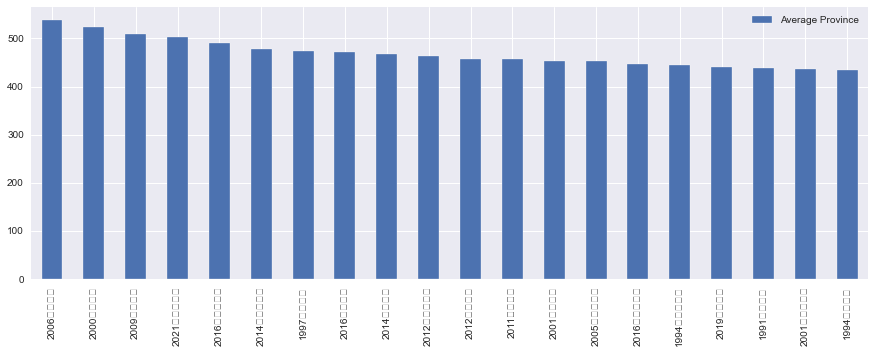

In [30]:
#Plot Top 20 Highest Rainfall in data set

df8_Top20Index.plot(x='YrProvince', y=['Average Province'], kind = 'bar', figsize=(15,5), edgecolor='white')
plt.xlabel(None)

**Try to see Top 20 Province with highest average rainfall (per month)**

I can see that 15 out of the top 16 province with highest rainfall are associated with provinces that are geographically located next to the sea/ocean. The exception is Nakorn Phanom. 17th to 20th are also not located next to sea/ocean. These include Nakorn Pthatom, Nakorn Panom, Nakorn Ratchasima and Nakorn Si Thammarat.

Originally, I thought perhaps visualizing data from provinces with high (or top 5-10 highest) rainfall will allow me to see trends and meaningful insight. But based on the below quiries, I think I should use data from country-wide to negate out influence from the the geographic location (i.e. province with proximity to sea/ocean will likely recieve more moist from evaporated sea/ocean leading to higher rainfall).

In [33]:
df9 = df8.groupby('Province').sum().reset_index(drop=False) 

df9.head(20)

,Province,Average Province
0,กระบี่,6526.300
1,กรุงเทพมหานคร,4846.380
2,กาญจนบุรี,4328.250
3,กาฬสินธุ์,3209.200
4,กำแพงเพชร,3958.000
5,ขอนแก่น,3779.600
6,จันทบุรี,9538.650
7,ฉะเชิงเทรา,4054.600
8,ชลบุรี,3693.320
9,ชัยนาท,3160.100


In [37]:
df9 = df9.sort_values(by=['Average Province'], ascending=False) 

df9.head(20)

,Province,Average Province
13,ตราด,14627.000000
40,ระนอง,12756.500000
31,พังงา,11652.300000
6,จันทบุรี,9538.650000
21,นราธิวาส,7903.400000
35,ภูเก็ต,7405.550000
19,นครศรีธรรมราช,7151.425000
50,สตูล,7080.500000
12,ตรัง,6686.000000
17,นครพนม,6579.450000


In [38]:
df9_Top20 = df9[df9['Average Province'] >= 5064] [['Province', 'Average Province'] ]

df9_Top20 = df9_Top20.rename(columns = {'index':'Province'})

df9_Top20

,Province,Average Province
13,ตราด,14627.000000
40,ระนอง,12756.500000
31,พังงา,11652.300000
6,จันทบุรี,9538.650000
21,นราธิวาส,7903.400000
35,ภูเก็ต,7405.550000
19,นครศรีธรรมราช,7151.425000
50,สตูล,7080.500000
12,ตรัง,6686.000000
17,นครพนม,6579.450000


Text(0.5, 0, '')

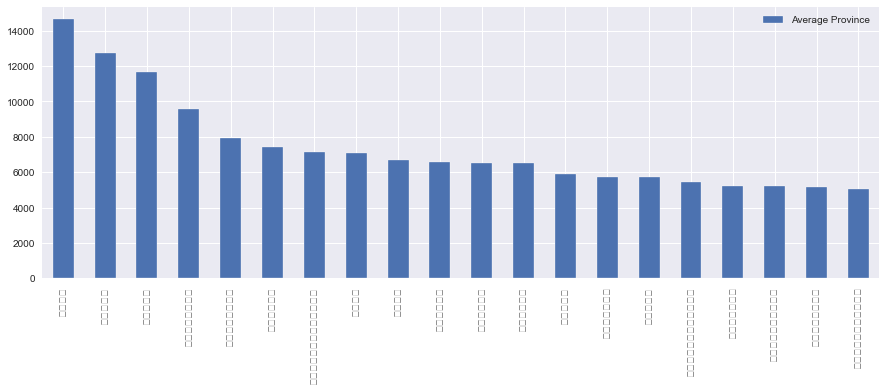

In [40]:
df9_Top20.plot(x='Province', y=['Average Province'], kind = 'bar', figsize=(15,5), edgecolor='white')
plt.xlabel(None)

#### Create 'DeMeanRain' column from difference between each province's  'Average Province' rainfall with mean of 'Average Province'.  

#Create 'binYear' column for plotting purpose. First try with 10 years binYear but after visualisation decided to change binYear to 5 years to see capture variation in DeMeanRain data.

#Creat 'Year_int' from converting type of data to int, also for plotting purpose.

In [43]:
df5 = df_join2.rename(columns = {'index':'new column name'})
df5['binYear'] = pd.cut(df5.Year.astype(int), bins=np.arange(1980,2031,5))
df5['Year_int'] = df5['Year'].astype(int)
df5['DeMeanRain'] = np.nan

temp_df = []
grouped = df5.groupby('Province')
for name, group in grouped:
    group.DeMeanRain = group['Average Province']-group['Average Province'].mean()
    temp_df.append(group)

df6 = pd.concat(temp_df)
df6    

,Year,Province,Average Province,binYear,Year_int,DeMeanRain
1987กระบี่,1987,กระบี่,220.10,"(1985, 1990]",1987,38.813889
1988กระบี่,1988,กระบี่,197.70,"(1985, 1990]",1988,16.413889
1989กระบี่,1989,กระบี่,196.10,"(1985, 1990]",1989,14.813889
1990กระบี่,1990,กระบี่,151.10,"(1985, 1990]",1990,-30.186111
1991กระบี่,1991,กระบี่,152.90,"(1990, 1995]",1991,-28.386111
...,...,...,...,...,...,...
2018แม่ฮ่องสอน,2018,แม่ฮ่องสอน,128.40,"(2015, 2020]",2018,21.515278
2019แม่ฮ่องสอน,2019,แม่ฮ่องสอน,113.75,"(2015, 2020]",2019,6.865278
2020แม่ฮ่องสอน,2020,แม่ฮ่องสอน,100.35,"(2015, 2020]",2020,-6.534722
2021แม่ฮ่องสอน,2021,แม่ฮ่องสอน,128.85,"(2020, 2025]",2021,21.965278


#### Pivot table to see DeMeanRain data that will be plotted with binYear of 5 and minimum Year_int.

In [44]:
df_pivot = pd.pivot_table(df6, index=['binYear'], values = ['Year_int', 'DeMeanRain'],
                         aggfunc={'Year_int': np.min, 'DeMeanRain' : np.mean})
df7 = df_pivot.reset_index()
#df6['midyear'] = df6['binYear']

df7

,binYear,DeMeanRain,Year_int
0,"(1985, 1990]",-10.759011,1987
1,"(1990, 1995]",-10.813686,1991
2,"(1995, 2000]",0.495314,1996
3,"(2000, 2005]",-6.197006,2001
4,"(2005, 2010]",0.701278,2006
5,"(2010, 2015]",4.870290,2011
6,"(2015, 2020]",10.267125,2016
7,"(2020, 2025]",15.744411,2021


### Need to correlate Thailand Rainfall Data with globally accepted index that can be used to link to El Nino and La Nina. 

Oceanic Nino Index (ONI) (https://ggweather.com/enso/oni.htm) According to the website ONI has become the de-facto standard that NOAA uses for classifying El Niño (warm) and La Niña (cool) events in the eastern tropical Pacific.
It is the running 3-month mean SST anomaly for the Niño 3.4 region (5°N-5°S, 120°-170°W). 
5 consecutive overlapping 3-month periods at or above the +0.5° anomaly for warm (El Niño) events and at or below the -0.5° anomaly for cool (La Niña) events.  The threshold is further broken down into Weak (with a 0.5 to 0.9 SST anomaly), Moderate (1.0 to 1.4), Strong (1.5 to 1.9) and Very Strong (≥ 2.0) events. 

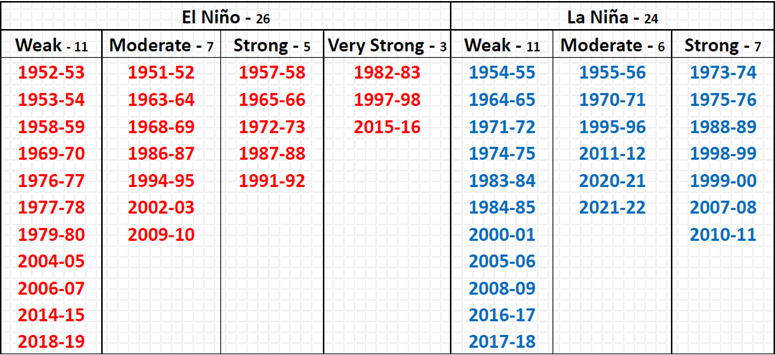

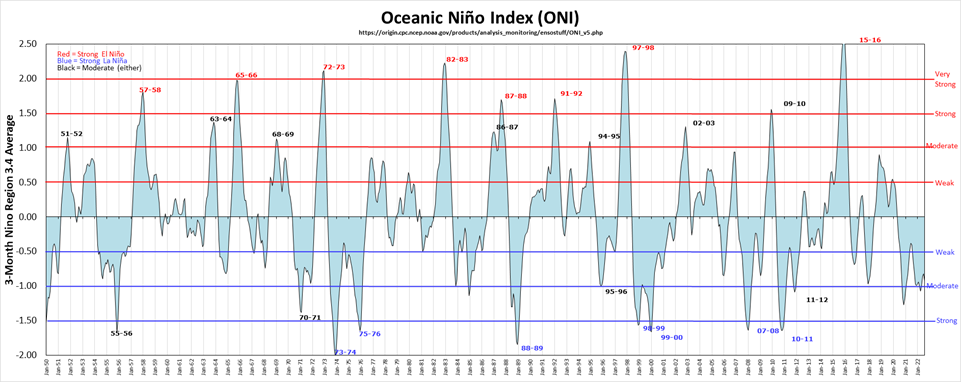

Although ONI is measured directly from a sea surface and a good indicator of global warming, a better index to correlate to rainfall data from Thailand should come from Southeast Asia. 

ONI will be used as a reference index to refer to El Nino and La Nina in this project. However, the data available from this website is shown as a graph. No numerical data in csv nor excel tables related to ONI are available. 

#### I create the csv file from reading the ONI index from the graph provided in  https://ggweather.com/enso/oni.htm. 

There is only one ONI for each year. This will greatly impact the shape and smoothness of the resultant ONI plot.

It should also be noted that the number in the table is Negative ONI index which is already converted in the excel file. This negative ONI will allow easier comparison with rainfall data from Thailand (i.e. High negative ONI curve will point in the same direction as high DeMeanRain and both of which suggest La Nina.  

**Import Neg_ONI data.**

In [45]:
#may need to change path of the ONI_1987_2022.csv
ONI_df = pd.read_csv('C:/Users/kruawunj/Desktop/ONI_1987_2022.csv')  
ONI_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     36 non-null     int64  
 1   Neg_ONI  36 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 704.0 bytes


In [46]:
ONI_df

,Year,Neg_ONI
0,1987,-1.20
1,1988,-1.70
2,1989,1.80
3,1990,-0.30
4,1991,-0.40
5,1992,-1.70
6,1993,0.25
7,1994,-0.70
8,1995,-1.10
9,1996,1.00


### Data Visualization

The main goal for me is to see if the years with high rainfall in Thailand coincide with the year reported to be la Nina year.

So, I plot DeMeanRain of every province that have data spanning the whole period of my interest (1987-2022).
Each point of DeMeanRain is the difference of average rainfall of that province in that year with the average rainfall of that year for the whole of Thailand. So, the positive number indicate that that province has higher than average rainfall.

I then highlight the data from province with high DeMeanRain (>120 mm) per month with red line, while the others are plotted in grey. This will help me visualize better and easier to compare with Neg_ONI plot.

In the same plot I also include the moving average of DeMeanRain (in blue). This line represent the average DeMeanRain for Thailand from 1987-2022. From the plot we can clearly see that this line increase from -10.76 to 15.74. This imply that rainfall are increased and the gap between lowest and higest rainfall averages are also getting higher (i.e. more intense rainfall).

Graph in the middle is to show the average rainfall from all provinces in Thailand that have data spanning from 1987-2022.
I highlight the data from province with high average rainfall (>300 mm) per month with red line, while the others are plotted in grey. 

The bottom most graph is the Neg_ONI plot which will be use to correlate with the top two graphs to see if there is a prositive correlation beween year with high rainfall and year with high Neg_ONI (la Nina year).

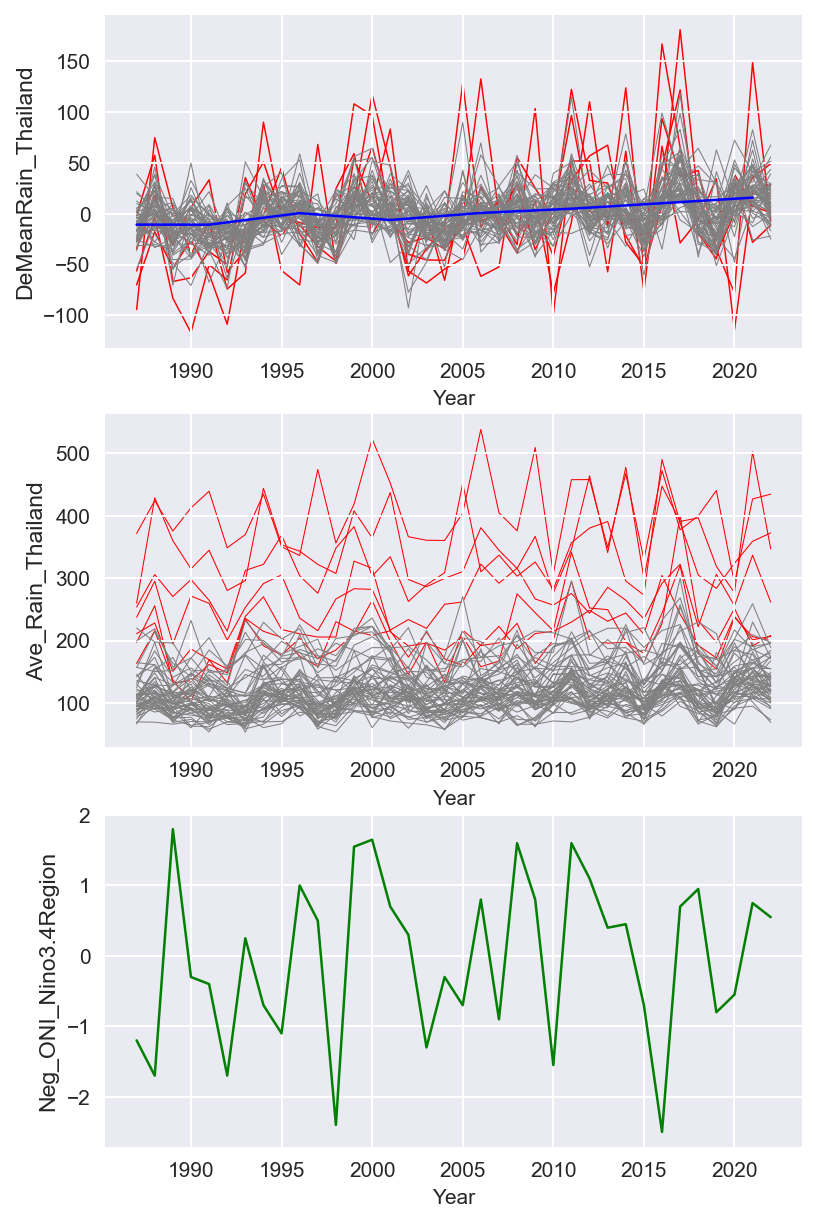

In [47]:
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

fig, axs=plt.subplots(figsize=(6,10), dpi=150, nrows=3) 

labelyear = np.arange(1987,2023,1)

# for ax in axs:
#     ax.plot(labelyear, data=data)
#     # Major ticks every half year, minor ticks every month,
#     ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1)))
#     #ax.xaxis.set_minor_locator(mdates.MonthLocator())

grouped = df6.groupby('Province')
for name, group in grouped:
    group = group.sort_values('Year_int').reset_index()
    if len(group.Year) ==36:
        plotx = group.Year_int
        ploty = group['Average Province']-group['Average Province'].mean()
        ploty2 = group['Average Province']
        #ploty3 = ONI_df.ONI
        #ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))
        #ax.xaxis.set_minor_locator(mdates.MonthLocator())
        #print(group.DeMeanRain)
        if group.DeMeanRain.max() >= 120:
            axs[0].plot(plotx,ploty, label=name, c='red', lw=0.7, zorder=0)
        else:
            axs[0].plot(plotx,ploty, label=name, c='grey', lw=0.5, zorder=1)

        #print(group[group.Year == '2022']['Average Province']-group['Average Province'].mean(),name)
        #axs[1].plot(plotx,ploty2, label=name)
        if group['Average Province'].max() >= 300:
            axs[1].plot(plotx,ploty2, label=name, c='red', lw=0.5, zorder=0)
        else:
            axs[1].plot(plotx,ploty2, label=name, c='grey', lw=0.5, zorder=1)
    #print(len(group.Year), name)

plotx = df7.Year_int
ploty = df7['DeMeanRain']
axs[0].plot(plotx,ploty, label=name, c='blue', lw=1.2)

#axs[0].set_xticklabels(labelyear,rotation=90) 
axs[0].set_xlabel('Year', size=10)
axs[0].set_ylabel('DeMeanRain_Thailand')
axs[1].set_xlabel('Year', size =10)
axs[1].set_ylabel('Ave_Rain_Thailand')
axs[2].set_xlabel('Year', size =10)
axs[2].set_ylabel('Neg_ONI_Nino3.4Region')

plotx = ONI_df.Year
ploty =ONI_df.Neg_ONI
axs[2].plot(plotx,ploty, label=name, c='green', lw=1.2)   

#axs.set_xticklabels(labelyear, fontsize=12)
#axs[0].set_xticklabel(labelyear, fontsize=12)

#axs.tick_params(axis='x', labelsixe=12)
#plt.xticks(fontsize=14, rotation=90)

#axs.tick_params(axis='both', which='major', labelsize=10)
#plt.rcParams.update({'font.size': 12})

#grouped = df6.groupby('Province')
#for name, group in grouped:
    #group = group.sort_values('Year_int').reset_index()

#ax2 = axs[0].twinx()

#print(group[group.Year == '2022']['Average Province']-group['Average Province'].mean(),name)
#axs[1].plot(plotx,ploty2, label=name)     
#h,l = axs.get_legend_handles_labels()

#axs[1].set_xticklabel(labelyear,rotation=90)

In [48]:
labelyear = np.arange(1987,2023,1)

print(labelyear)

[1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000
 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015 2016 2017 2018 2019 2020 2021 2022]


In [49]:
Annual= df4["Annual"]
max_value = Annual.max()

print(max_value)

6463.200000000001
